In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL2dlc3Rpb25fYWN0aWZz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_39754/59611623.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

In [2]:
#------------------------------------#
#---------- Package Imports ---------#
#------------------------------------#

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_data(start_date, end_date, index_ticker, tickers, column="Close"):
    """
    Extraction de prix de clôture d'actions
    """
    # Extraction des volumes historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)[column]

    # Extraction des volumes historiques de l'indice de reférence
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)[column]

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

end_date = datetime.now()
start_date = end_date - timedelta(days=3*31)

selected_assets = {
    "SAN.PA" : "Sanofi",
    "GLE.PA" : "Société générale",
    "HO.PA" : "Thales",
    "ENGI.PA" : "Engie",
    "CAP.PA" : "Capgemini",
    "CA.PA" : "Carrefour",
    "ORA.PA" : "Orange",
    "AC.PA" : "Accor",
    "OR.PA" : "L'Oreal",
    "ACA.PA" : "Crédit agricole",
    }

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker, column="Volume")

[                       0%                       ]

[                       0%                       ]

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[*********************100%***********************]  10 of 10 completed


[*********************100%***********************]  1 of 1 completed

In [4]:
portfolio_data = data["portfolio_data"]
portfolio_data.tail()

Ticker,AC.PA,ACA.PA,CA.PA,CAP.PA,ENGI.PA,GLE.PA,HO.PA,OR.PA,ORA.PA,SAN.PA
Date,,,,,,,,,,
2025-03-24,730382,5071701,3617903,534016,5262159,2127625,371968,411521,7155931,1913393
2025-03-25,562409,6524905,2255242,558654,5809793,2587026,321188,353058,6643361,2079709
2025-03-26,655970,4275680,1989898,570364,5282143,2412206,300659,415637,7164082,2056619
2025-03-27,654205,4746013,2208609,560011,6384021,3124962,317644,371877,7035243,1645925
2025-03-28,973322,5792588,2671535,465431,5227544,2992606,298259,418671,5970202,2141022


In [5]:
#---------------------#
# Calcul des ADV 3Mois#
#---------------------#

adv_3m = {ticker : np.mean(portfolio_data[ticker]) for ticker in assets_ticker}
adv_3m

ADV = pd.DataFrame.from_dict(adv_3m, orient='index', columns=['ADV'])

# trier par ADV
ADV.sort_values(by='ADV', ascending=False)

,ADV
ORA.PA,7.681298e+06
ACA.PA,6.942001e+06
ENGI.PA,6.072020e+06
GLE.PA,3.524290e+06
CA.PA,3.008415e+06
SAN.PA,1.827452e+06
AC.PA,6.501683e+05
CAP.PA,5.081382e+05
OR.PA,4.590586e+05
HO.PA,3.903374e+05


In [6]:
# Génération des quantités
np.random.seed(123)
ADV["Quantity"] =  round(1.5 * np.random.rand(len(ADV["ADV"])) * ADV["ADV"])
ADV

,ADV,Quantity
SAN.PA,1.827452e+06,1909146.0
GLE.PA,3.524290e+06,1512657.0
HO.PA,3.903374e+05,132823.0
ENGI.PA,6.072020e+06,5021391.0
CAP.PA,5.081382e+05,548385.0
CA.PA,3.008415e+06,1909319.0
ORA.PA,7.681298e+06,11300313.0
AC.PA,6.501683e+05,667882.0
OR.PA,4.590586e+05,331164.0
ACA.PA,6.942001e+06,4083121.0


In [7]:
# Quantité liquidable en 1 jour
market_depth = 20/100
ADV["Quantity in 1day"] = round(ADV["ADV"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV["Days of liquidation"] = ADV["Quantity"]/ADV["Quantity in 1day"]

# floor to 1 and round
ADV["Days of liquidation"] = ADV["Days of liquidation"].apply(lambda x: max(1, round(x)))
ADV

,ADV,Quantity,Quantity in 1day,Days of liquidation
SAN.PA,1.827452e+06,1909146.0,365490.0,5
GLE.PA,3.524290e+06,1512657.0,704858.0,2
HO.PA,3.903374e+05,132823.0,78067.0,2
ENGI.PA,6.072020e+06,5021391.0,1214404.0,4
CAP.PA,5.081382e+05,548385.0,101628.0,5
CA.PA,3.008415e+06,1909319.0,601683.0,3
ORA.PA,7.681298e+06,11300313.0,1536260.0,7
AC.PA,6.501683e+05,667882.0,130034.0,5
OR.PA,4.590586e+05,331164.0,91812.0,4
ACA.PA,6.942001e+06,4083121.0,1388400.0,3


In [8]:
time_elapsed = ADV['Days of liquidation'].max()
print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")

Temps de liquidation du portefeuille : 7 jours


In [9]:
#---------------------------#
# Liquidation du portefeuille
#---------------------------#

ADV["Quantity liquidated"] = 0  # Initialement, rien n'est liquidé

# Au jour 0, on a liquidé 0. La colonne 0 sert de quantité initiale
quantity_liquidated_per_day = [ADV["Quantity"]]

while (ADV["Quantity"] - ADV["Quantity liquidated"]).sum() > 0 : # Tant qu'il y a des liquidations à faire
    # Calculer la quantité liquide au jour i
    liquidated_today = np.minimum(ADV["Quantity in 1day"], ADV["Quantity"] - ADV["Quantity liquidated"])
    
    # Mettre à jour les quantités liquidées dans le DataFrame
    ADV["Quantity liquidated"] += liquidated_today
    
    # Stocker les quantités liquidées ce jour dans une liste
    quantity_liquidated_per_day.append(liquidated_today)

liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]

liquidation_df

,0,1,2,3,4,5,6,7,8
SAN.PA,1909146.0,365490.0,365490.0,365490.0,365490.0,365490.0,81696.0,0.0,0.0
GLE.PA,1512657.0,704858.0,704858.0,102941.0,0.0,0.0,0.0,0.0,0.0
HO.PA,132823.0,78067.0,54756.0,0.0,0.0,0.0,0.0,0.0,0.0
ENGI.PA,5021391.0,1214404.0,1214404.0,1214404.0,1214404.0,163775.0,0.0,0.0,0.0
CAP.PA,548385.0,101628.0,101628.0,101628.0,101628.0,101628.0,40245.0,0.0,0.0
CA.PA,1909319.0,601683.0,601683.0,601683.0,104270.0,0.0,0.0,0.0,0.0
ORA.PA,11300313.0,1536260.0,1536260.0,1536260.0,1536260.0,1536260.0,1536260.0,1536260.0,546493.0
AC.PA,667882.0,130034.0,130034.0,130034.0,130034.0,130034.0,17712.0,0.0,0.0
OR.PA,331164.0,91812.0,91812.0,91812.0,55728.0,0.0,0.0,0.0,0.0
ACA.PA,4083121.0,1388400.0,1388400.0,1306321.0,0.0,0.0,0.0,0.0,0.0


In [10]:
end_date = datetime.now()
start_date = end_date - timedelta(days=5)
price_data = get_data(start_date, end_date, index, assets_ticker, column="Close")

price_data["portfolio_data"].head()
price_dict = price_data["portfolio_data"].iloc[-1].to_dict()

print("="*50)
print("Prix des actifs à la date du jour")
print("="*50)
for ticker, price in price_dict.items():
    print(f"Le prix de l'actif {selected_assets[ticker]} est de {price} €")

[                       0%                       ]

[**************        30%                       ]  3 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed


[*********************100%***********************]  1 of 1 completed

Prix des actifs à la date du jour
Le prix de l'actif Accor est de 42.790000915527344 €
Le prix de l'actif Crédit agricole est de 16.94499969482422 €
Le prix de l'actif Carrefour est de 13.255000114440918 €
Le prix de l'actif Capgemini est de 145.3000030517578 €
Le prix de l'actif Engie est de 18.059999465942383 €
Le prix de l'actif Société générale est de 42.540000915527344 €
Le prix de l'actif Thales est de 246.60000610351562 €
Le prix de l'actif L'Oreal est de 345.1000061035156 €
Le prix de l'actif Orange est de 11.850000381469727 €
Le prix de l'actif Sanofi est de 103.4000015258789 €


In [11]:
# Valeur liquide des actions par jour de liquidation
market_value =[
    price_dict[ticker] * liquidation_df.loc[ticker]
    for ticker in selected_assets
]

market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
market_value

,0,1,2,3,4,5,6,7,8
SAN.PA,1.974057e+08,3.779167e+07,3.779167e+07,3.779167e+07,3.779167e+07,3.779167e+07,8.447367e+06,0.000000e+00,0.000000e+00
GLE.PA,6.434843e+07,2.998466e+07,2.998466e+07,4.379110e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HO.PA,3.275415e+07,1.925132e+07,1.350283e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ENGI.PA,9.068632e+07,2.193214e+07,2.193214e+07,2.193214e+07,2.193214e+07,2.957776e+06,0.000000e+00,0.000000e+00,0.000000e+00
CAP.PA,7.968034e+07,1.476655e+07,1.476655e+07,1.476655e+07,1.476655e+07,1.476655e+07,5.847599e+06,0.000000e+00,0.000000e+00
CA.PA,2.530802e+07,7.975308e+06,7.975308e+06,7.975308e+06,1.382099e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ORA.PA,1.339087e+08,1.820468e+07,1.820468e+07,1.820468e+07,1.820468e+07,1.820468e+07,1.820468e+07,1.820468e+07,6.475942e+06
AC.PA,2.857867e+07,5.564155e+06,5.564155e+06,5.564155e+06,5.564155e+06,5.564155e+06,7.578965e+05,0.000000e+00,0.000000e+00
OR.PA,1.142847e+08,3.168432e+07,3.168432e+07,3.168432e+07,1.923173e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ACA.PA,6.918848e+07,2.352644e+07,2.352644e+07,2.213561e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
# Calcul de la valeur de marché initiale et totale
market_value_0 = market_value.iloc[:, 0]
total_market_value_0 = market_value_0.sum()

print(f" La valeur de marché initiale est de {total_market_value_0}€")

# Calcul de la valeur de marché cumulée (à partir de la colonne 1)
cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

weights = {}
for ticker in assets_ticker :
    weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

weights = pd.DataFrame(weights).T
weights.head()

 La valeur de marché initiale est de 836143533.8764086€


,0,1,2,3,4,5,6,7,8
SAN.PA,0.236091,0.255194,0.289688,0.328122,0.336963,0.145800,0.0,0.0,NaN
GLE.PA,0.076959,0.054941,0.010413,0.000000,0.000000,0.000000,0.0,0.0,NaN
HO.PA,0.039173,0.021589,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN
ENGI.PA,0.108458,0.109925,0.111341,0.097190,0.021555,0.000000,0.0,0.0,NaN
CAP.PA,0.095295,0.103785,0.119248,0.138154,0.150224,0.100928,0.0,0.0,NaN


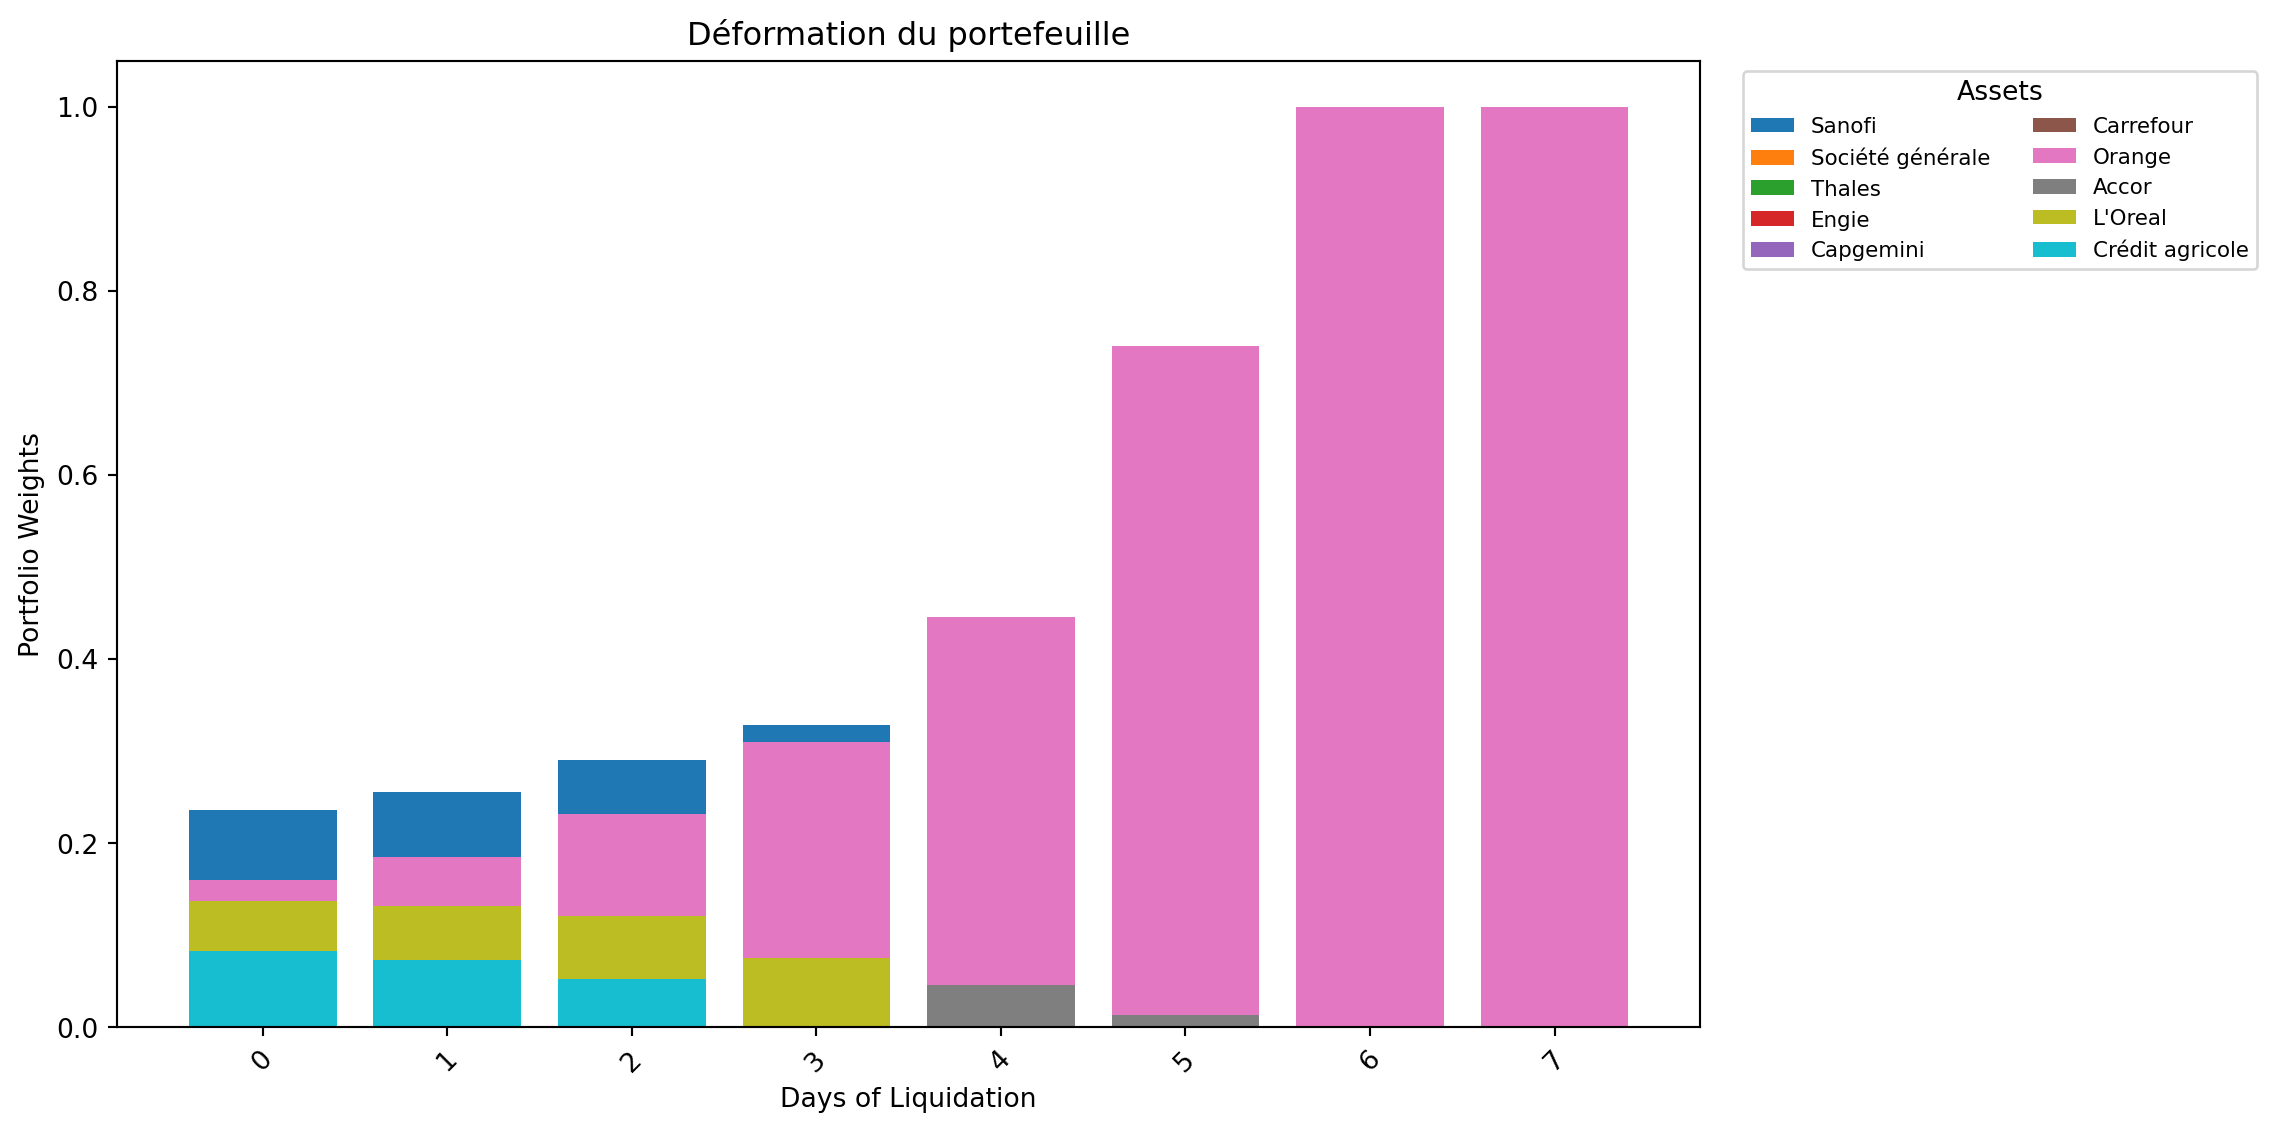

In [13]:
plt.figure(figsize=(12, 6))

# Barplot empilé
for asset in weights.index:
    bottom = None
    plt.bar(
        pd.to_numeric(weights.columns),  
        weights.loc[asset],  
        bottom=bottom,  
        label=selected_assets[asset]  
    )
    bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

plt.xlabel("Days of Liquidation")
plt.ylabel("Portfolio Weights")
plt.title("Déformation du portefeuille")
plt.xticks(rotation=45)
plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()

plt.show()

In [14]:
# Valeur liquide du portefeuille
market_value_df = pd.DataFrame()

market_value_df["market_value"] = market_value.sum(axis=0)

# Calculer la valeur liquide relative par rapport au jour 0
market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]

# Calculer la valeur cumulée liquide relative du portefeuille
market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1

market_value_df

,market_value,relative value,cumulative value
0,8.361435e+08,1.000000,0.000000
1,2.106812e+08,0.251968,0.251968
2,2.049327e+08,0.245093,0.497061
3,1.644335e+08,0.196657,0.693718
4,1.188730e+08,0.142168,0.835886
5,7.928483e+07,0.094822,0.930708
6,3.325754e+07,0.039775,0.970483
7,1.820468e+07,0.021772,0.992255
8,6.475942e+06,0.007745,1.000000


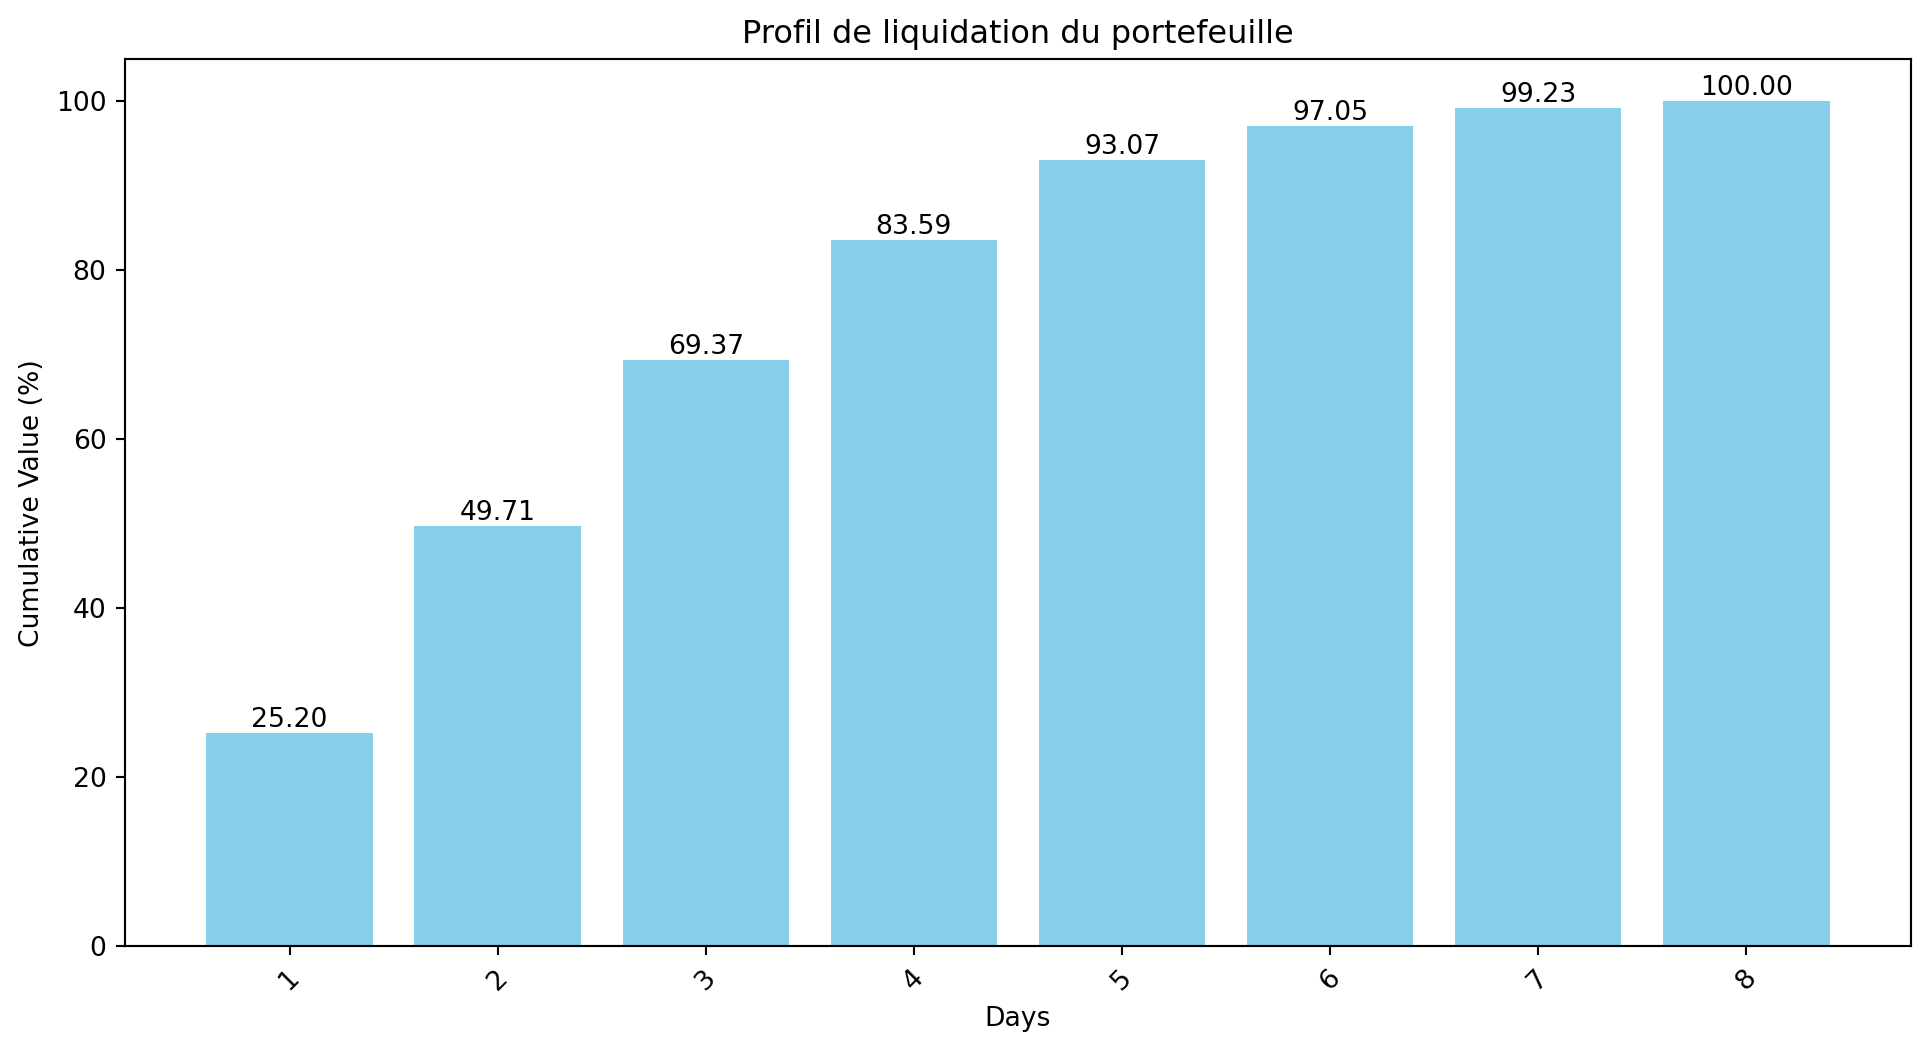

In [15]:
market_value_df = market_value_df.iloc[1:]

plt.figure(figsize=(12, 6))
bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center text
        height,  # Position slightly above the bar
        f'{height:.2f}',  # Format with 2 decimal places
        ha='center',  # Center horizontally
        va='bottom',  # Position text at the bottom
        fontsize=10, color="black"
    )

plt.xlabel("Days")
plt.ylabel("Cumulative Value (%)")
plt.title("Profil de liquidation du portefeuille")
plt.xticks(rotation=45)

plt.show()

In [16]:
def waterfall_liquidation(ADV, price_dict, selected_assets, fact_modulation=0.30, plot_graphs=True):
    """
    Calcule le profil de liquidation et visualise les graphiques des poids et des valeurs cumulées.
    """
    
    # Initialisation des quantités liquidées
    ADV = ADV.copy()
    ADV["Quantity"] = round(ADV["Quantity"] * fact_modulation)

    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"]]
    
    time_elapsed = 0 
    # Calcul des quantités liquidées par jour
    while (ADV["Quantity"] - ADV["Quantity liquidated"]).sum() > 0 :
        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] - ADV["Quantity liquidated"]
        )
        ADV["Quantity liquidated"] += liquidated_today
        quantity_liquidated_per_day.append(liquidated_today)
        time_elapsed += 1
    
    print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    #---------------------------#
    # Calcul des poids par jour #
    #---------------------------#

    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])

    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T
    
    # Visualisation des poids
    if plot_graphs:
        # Initialiser le graphique
        plt.figure(figsize=(10, 4))
        

        # Barplot empilé
        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns), 
                weights.loc[asset],  
                bottom=bottom, 
                label=selected_assets[asset]  
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()

        plt.show()

    
    #---------------------------#
    #   Profil de liquidation   #
    #---------------------------#

    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(10, 4))
        bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center text
                height,  # Position slightly above the bar
                f'{height:.2f}',  # Format with 2 decimal places
                ha='center',  # Center horizontally
                va='bottom',  # Position text at the bottom
                fontsize=10, color="black"
            )
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()

    return market_value_df, market_value, weights

Temps de liquidation du portefeuille : 3 jours


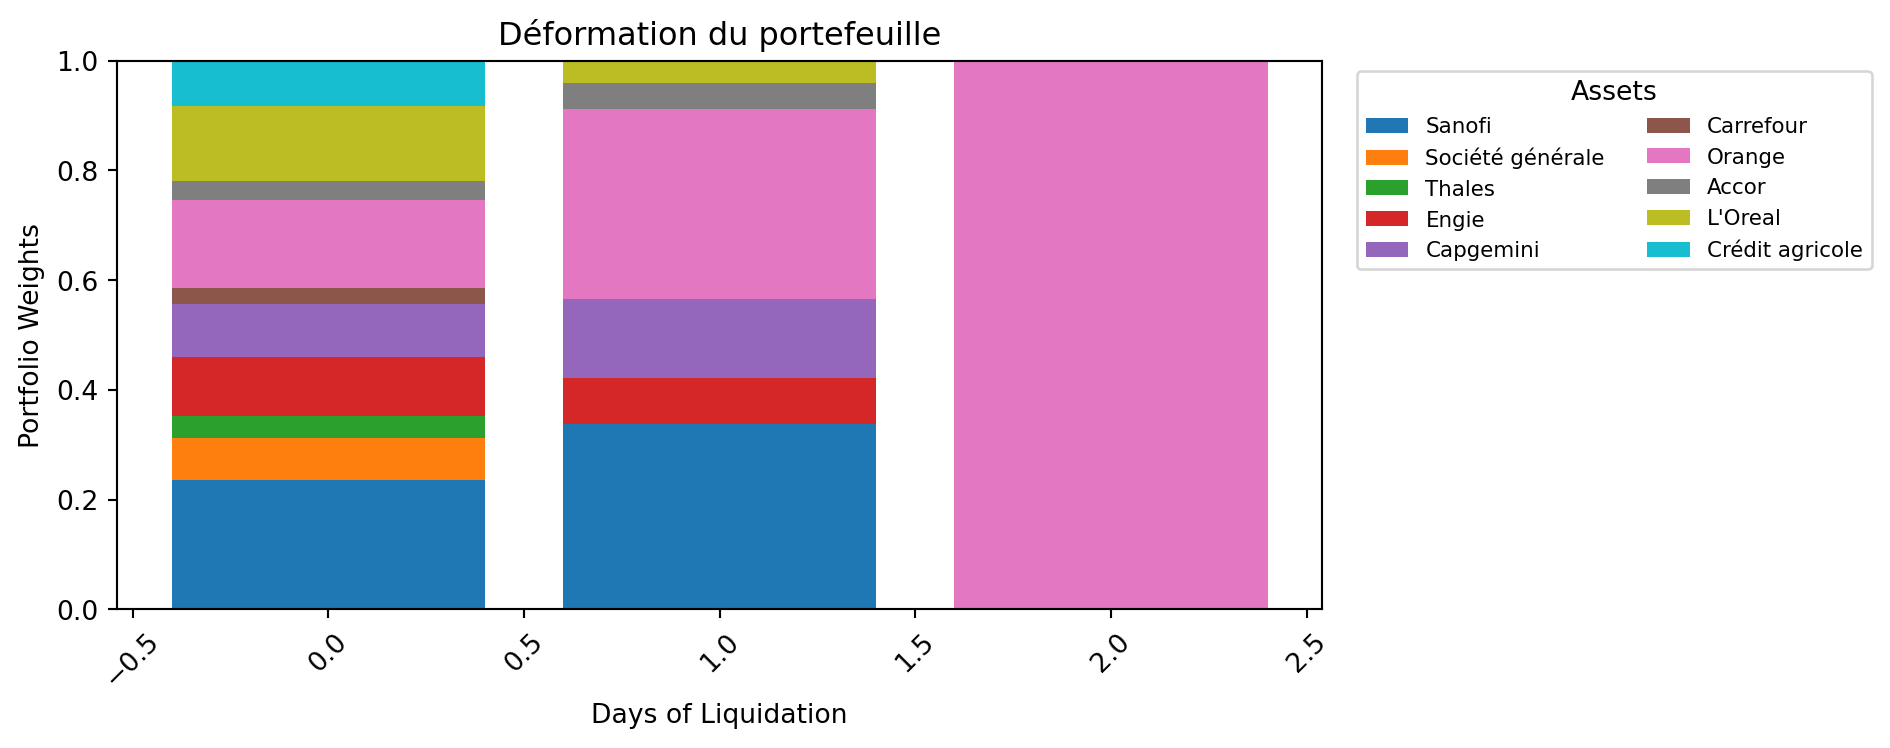

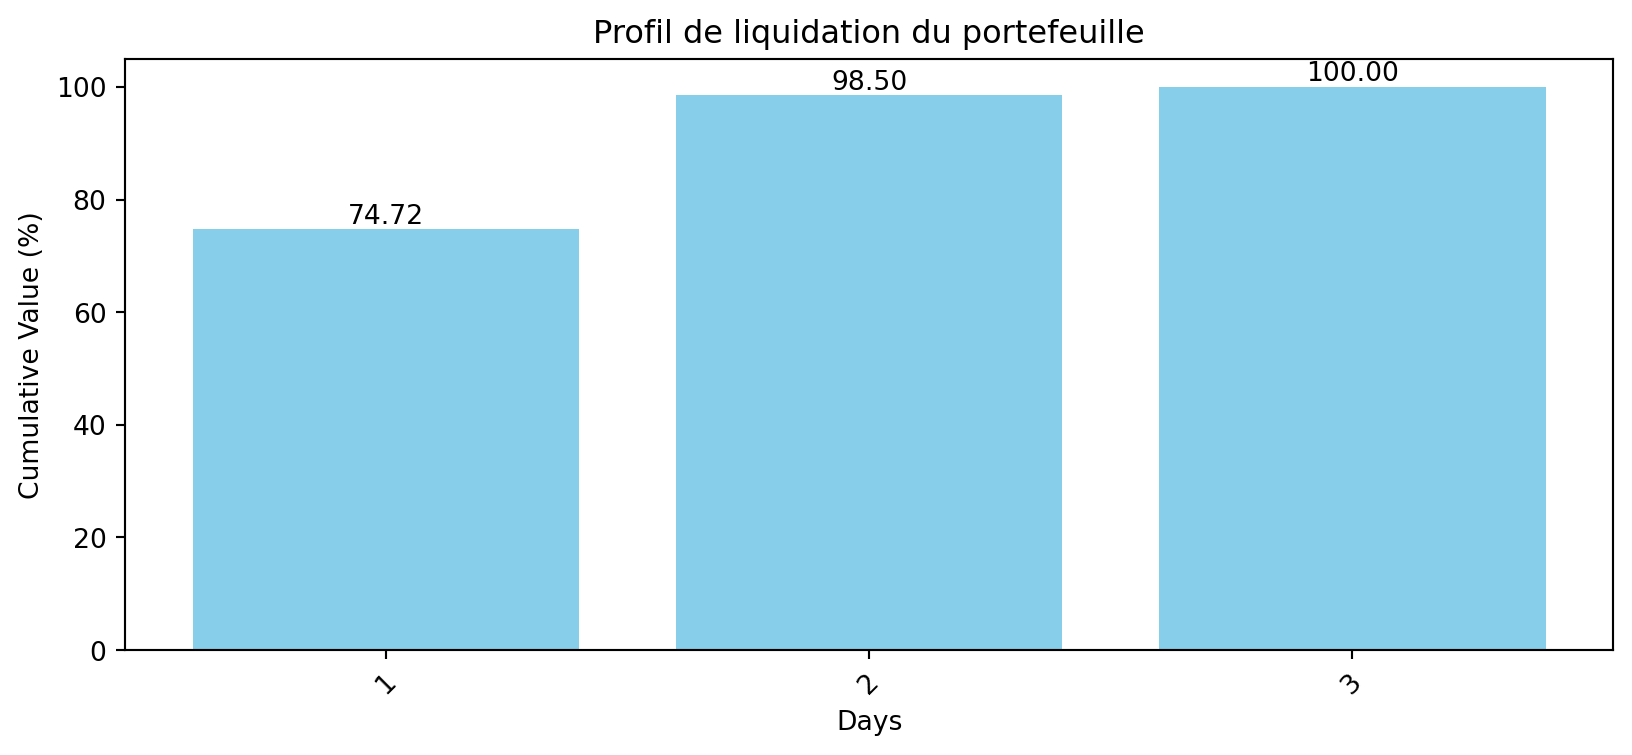

In [17]:
fact_modulation= 0.3
new_market_value_df, new_market_value, new_weights = waterfall_liquidation(ADV, price_dict, selected_assets, fact_modulation, plot_graphs=True)

In [18]:
#---------------------------#
# Stress Test
#---------------------------#
ADV_stressed = ADV.copy()

# Quantité journalière
market_depth = (20/100)/2  # On stresse la liquidité à la baisse
ADV_stressed["Quantity in 1day"] = round(ADV_stressed["ADV"] * market_depth)

# Calcul du nombre de jours de liquidation
ADV_stressed["Days of liquidation"] = ADV_stressed["Quantity"]/ADV_stressed["Quantity in 1day"]

# floor to 1 and round
ADV_stressed["Days of liquidation"] = ADV_stressed["Days of liquidation"].apply(lambda x: max(1, round(x)))

time_elapsed = ADV_stressed['Days of liquidation'].max()
print(f"Temps de liquidation du portefeuille stressé: {time_elapsed} jours")

Temps de liquidation du portefeuille stressé: 15 jours


Temps de liquidation du portefeuille : 15 jours


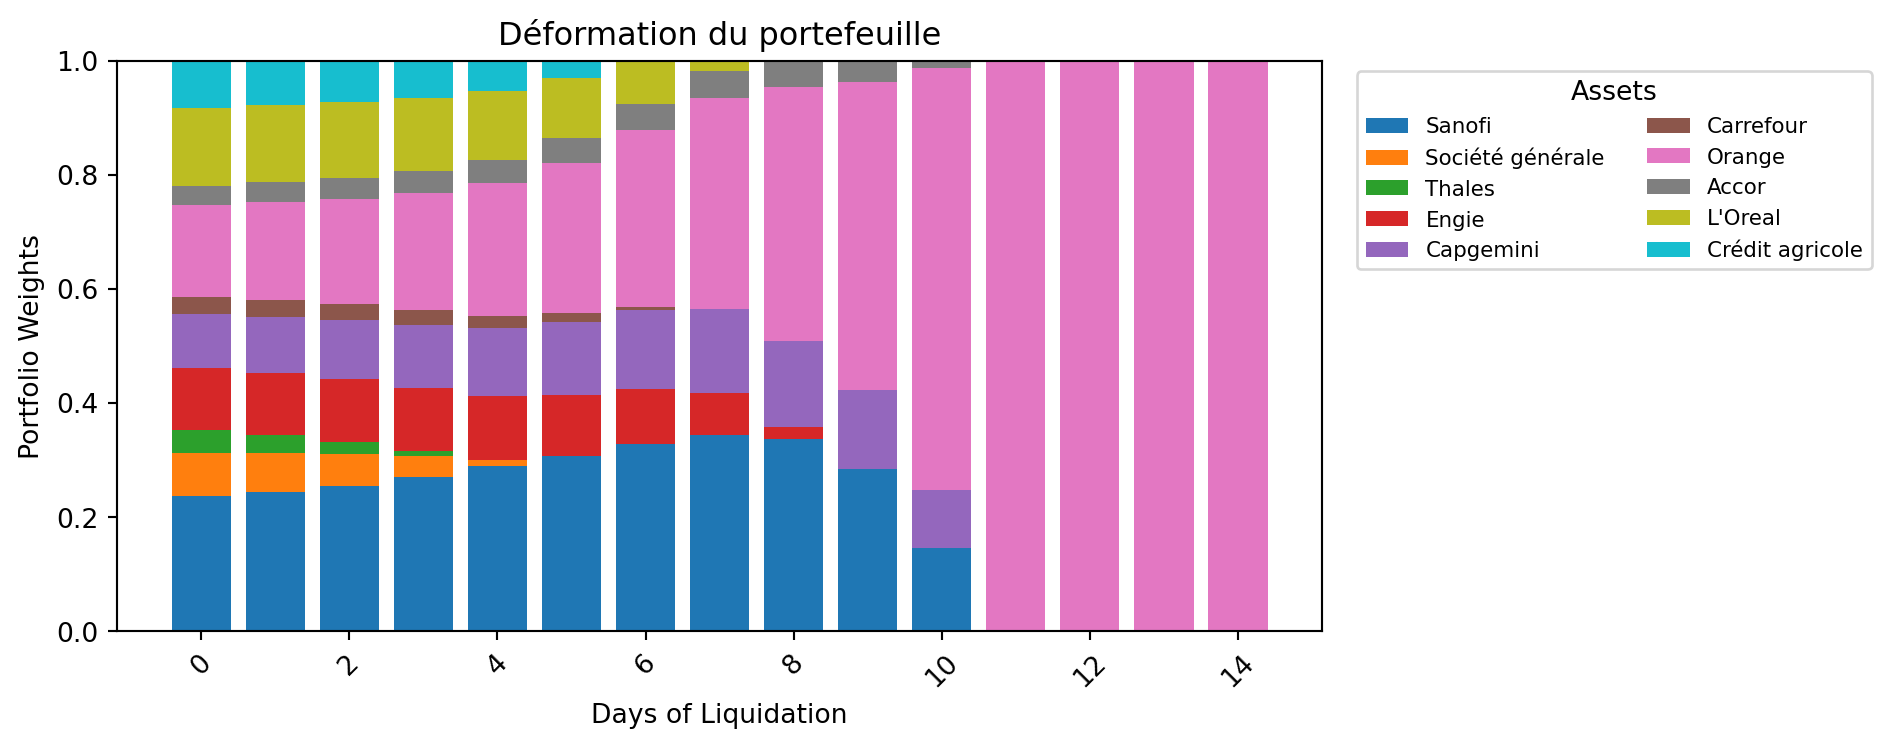

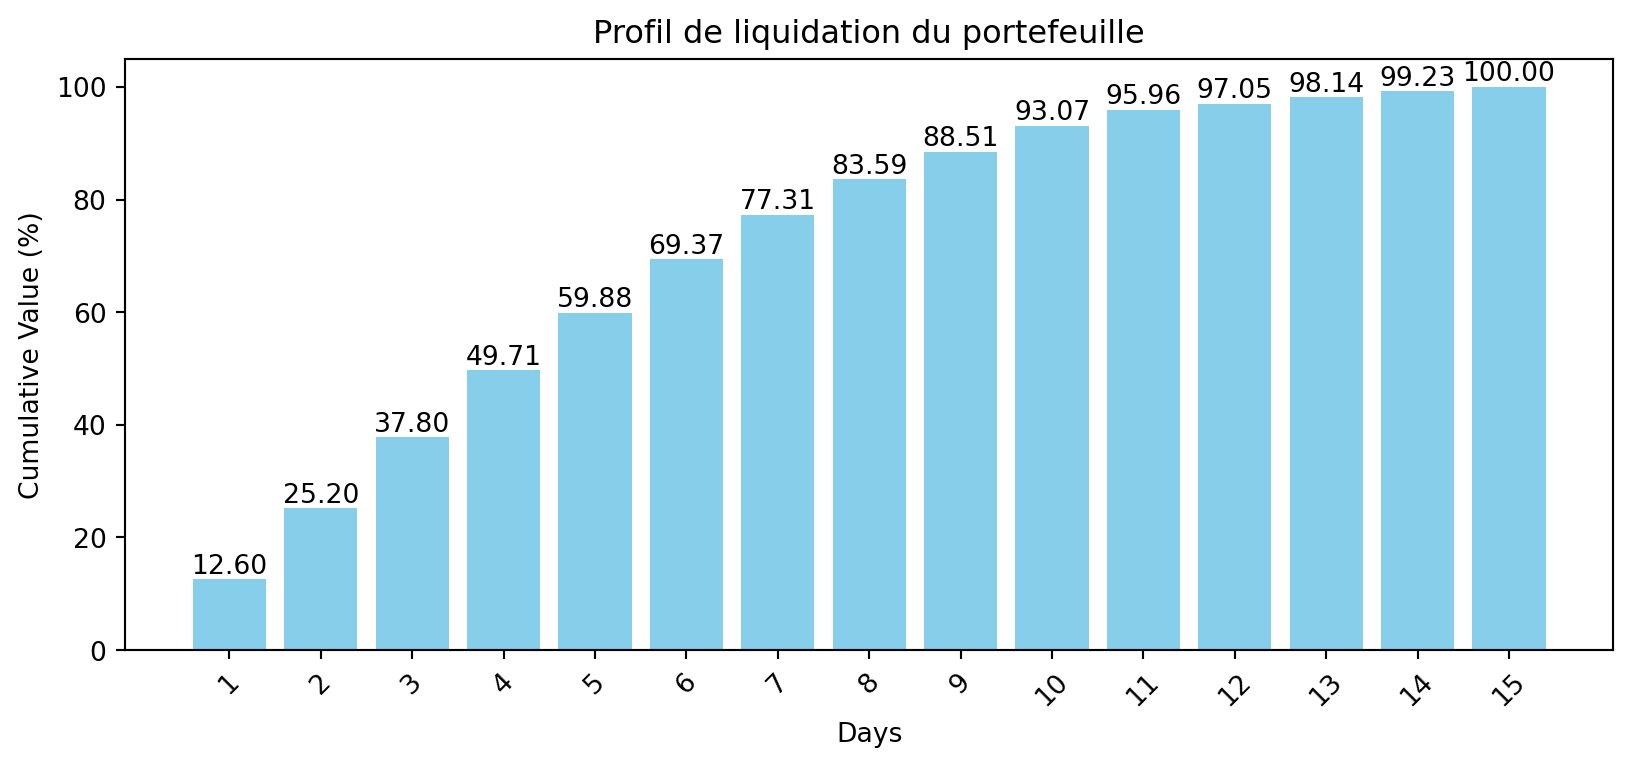

In [19]:
stressed_market_value_df, stressed_market_value, stressed_weights = waterfall_liquidation(ADV=ADV_stressed, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pro_forma_liquidation(ADV, price_dict, selected_assets, fact_modulation=0.30, plot_graphs=True):
    """
    Calcule le profil de liquidation pro forma et visualise les graphiques des poids et des valeurs cumulées.
    """

    ADV = ADV.copy()
    ADV["Quantity"] = ADV["Quantity"] * fact_modulation

    time_elapsed = ADV['Days of liquidation'].max()

    ADV["Quantity liquidated"] = 0
    quantity_liquidated_per_day = [ADV["Quantity"]]
    
    min_liquidated_today = np.ones(len(ADV["Quantity"]))
    time_elapsed = 0 

    # Calcul des quantités liquidées par jour
    while min_liquidated_today.sum() > 0:  

        liquidated_today = np.minimum(
            ADV["Quantity in 1day"], 
            ADV["Quantity"] - ADV["Quantity liquidated"]
        ) / ADV["Quantity"]
        min_liquidated_today = round(np.min(liquidated_today) * ADV["Quantity"])# On liquide à la vitesse de l'actif le moins liquide
        ADV["Quantity liquidated"] += min_liquidated_today
        quantity_liquidated_per_day.append(min_liquidated_today)
        time_elapsed += 1
    
    print(f"Temps de liquidation du portefeuille : {time_elapsed} jours")
    
    # Conversion des résultats en DataFrame
    liquidation_df = pd.DataFrame(quantity_liquidated_per_day).T
    liquidation_df.columns = [f"{i}" for i in range(len(quantity_liquidated_per_day))]
    
    # Calcul de la valeur liquide par actif et par jour
    market_value = [
        price_dict[ticker] * liquidation_df.loc[ticker]
        for ticker in selected_assets
    ]
    market_value = pd.DataFrame(market_value, index=selected_assets, columns=liquidation_df.columns)
    
    #---------------------------#
    # Calcul des poids par jour
    #---------------------------#

    # Calcul de la valeur de marché initiale et totale
    market_value_0 = market_value.iloc[:, 0]
    total_market_value_0 = market_value_0.sum()

    # Calcul de la valeur de marché cumulée (à partir de la colonne 1)
    cumsum_market_value = market_value.iloc[:, 1:].cumsum(axis=1)
    cumsum_total_market_value = market_value.iloc[:, 1:].sum(axis=0).cumsum()
    cumsum_market_value = pd.concat([pd.DataFrame(0, index=market_value.index, columns=[0]), cumsum_market_value], axis=1)
    cumsum_total_market_value = pd.concat([pd.Series(0, index=[0]), cumsum_total_market_value])
    
    weights = {}
    for ticker in selected_assets :
        weights[ticker] = (market_value_0.loc[ticker] - cumsum_market_value.loc[ticker]) / (total_market_value_0 - cumsum_total_market_value)

    weights = pd.DataFrame(weights).T

    if plot_graphs:
        plt.figure(figsize=(10, 4))

        bottom = None
        for asset in weights.index:
            plt.bar(
                pd.to_numeric(weights.columns), 
                weights.loc[asset],  
                bottom=bottom, 
                label=selected_assets[asset]  
            )
            bottom = weights.loc[asset] if bottom is None else bottom + weights.loc[asset]

        plt.xlabel("Days of Liquidation")
        plt.ylabel("Portfolio Weights")
        plt.title("Déformation du portefeuille")
        plt.xticks(rotation=45)
        plt.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.show()

    
    #---------------------------#
    #   Profil de liquidation   #
    #---------------------------#
    
    market_value_df = pd.DataFrame()
    market_value_df["market_value"] = market_value.sum(axis=0)
    
    # Calcul des valeurs relatives et cumulées
    market_value_df["relative value"] = market_value_df["market_value"] / market_value_df["market_value"].iloc[0]
    market_value_df["cumulative value"] = market_value_df["relative value"].cumsum() - 1
    market_value_df = market_value_df.iloc[1:]  # Retirer le jour 0 pour l'analyse cumulée
    
    # Visualisation de la valeur cumulative (barplot)
    if plot_graphs:
        plt.figure(figsize=(10, 4))
        bars = plt.bar(market_value_df.index, market_value_df["cumulative value"] * 100, color="skyblue")
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center text
                height,  # Position slightly above the bar
                f'{height:.2f}',  # Format with 2 decimal places
                ha='center',  # Center horizontally
                va='bottom',  # Position text at the bottom
                fontsize=10, color="black"
            )
        plt.xlabel("Days")
        plt.ylabel("Cumulative Value (%)")
        plt.title("Profil de liquidation du portefeuille")
        plt.xticks(rotation=45)
        plt.show()
    return market_value_df, market_value, weights

Temps de liquidation du portefeuille : 9 jours


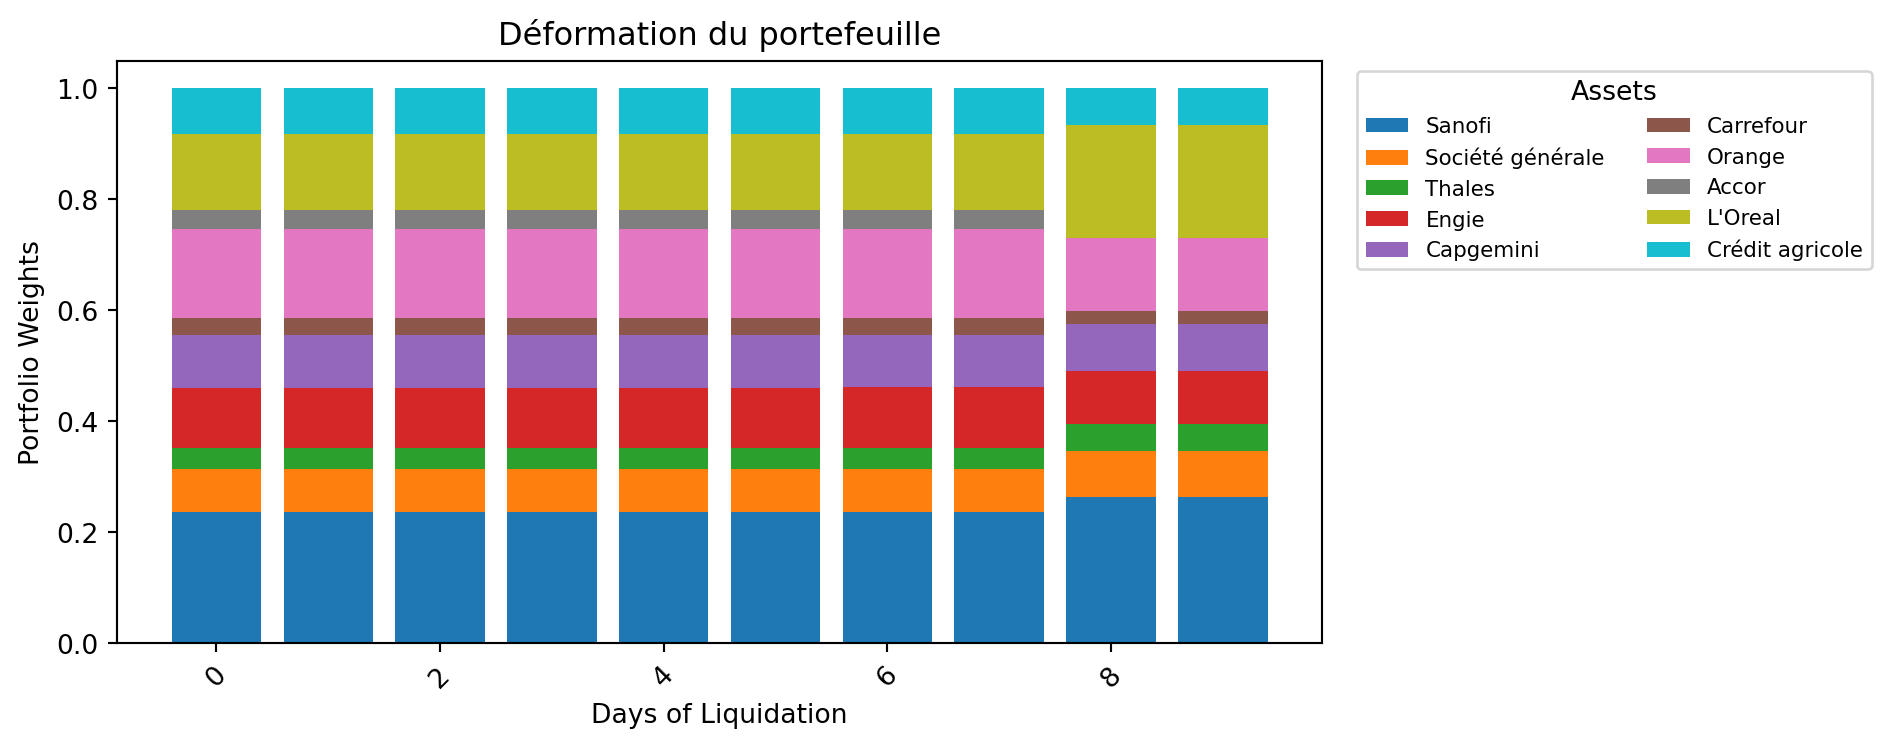

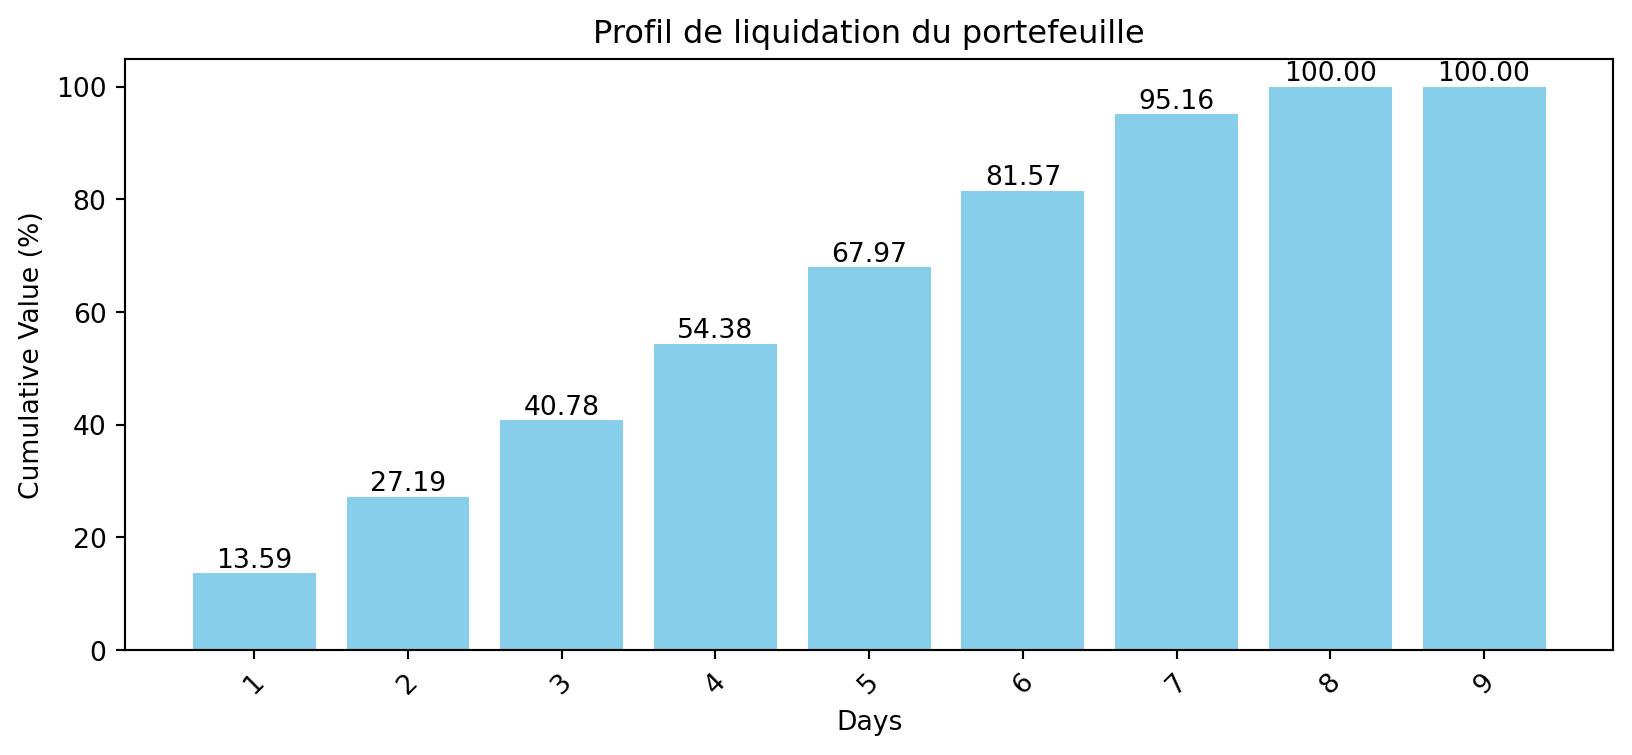

In [21]:
proforma_market_value_df, proforma_market_value, proforma_weights = pro_forma_liquidation(ADV=ADV, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)

Temps de liquidation du portefeuille : 16 jours


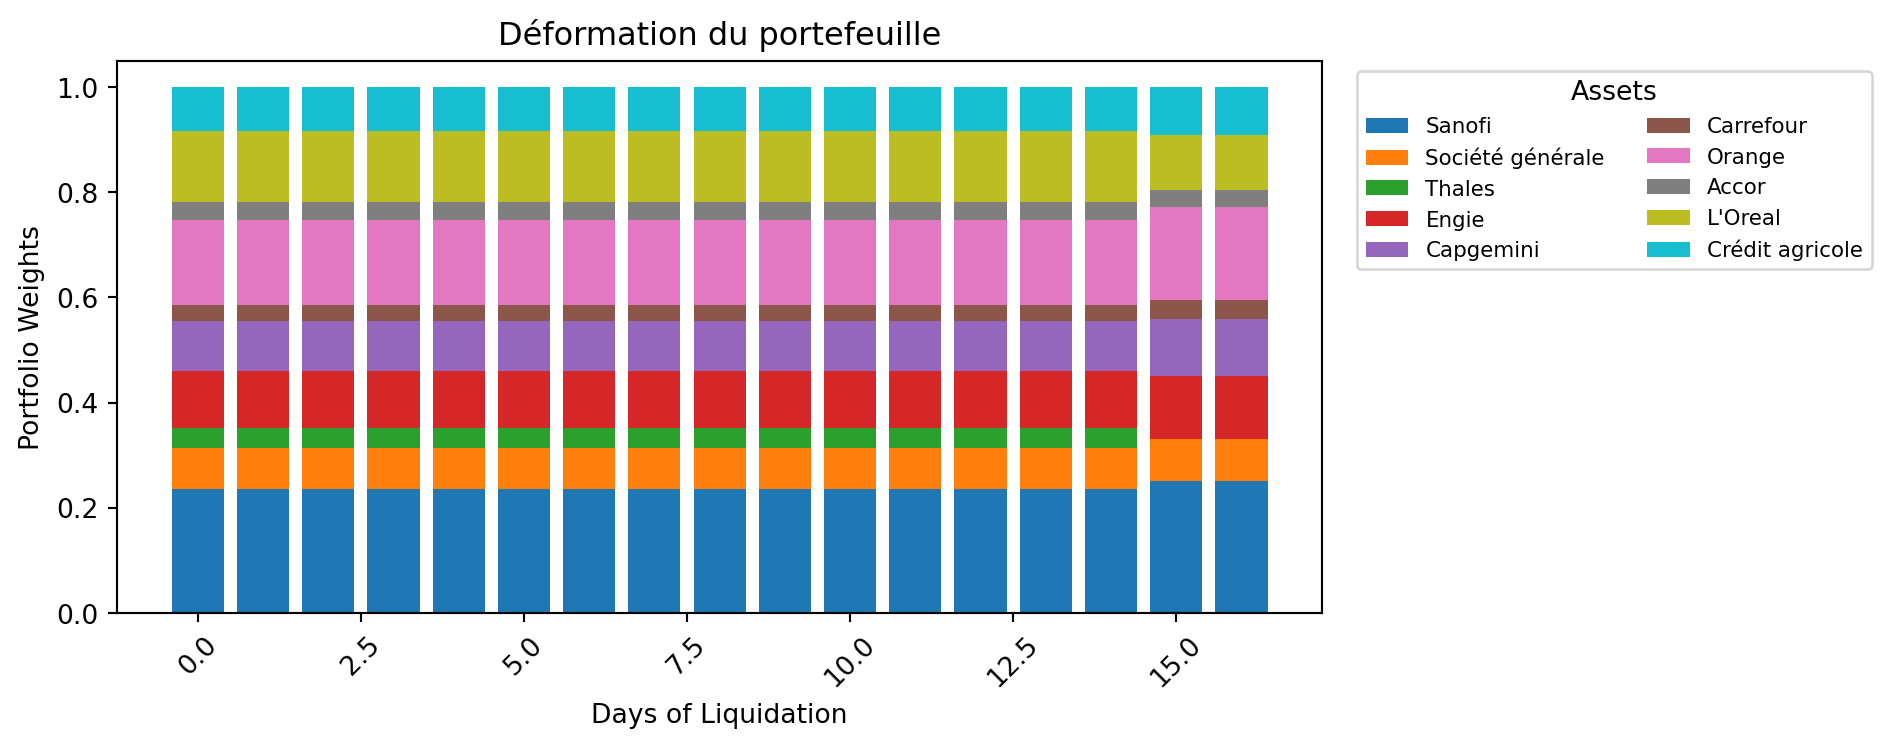

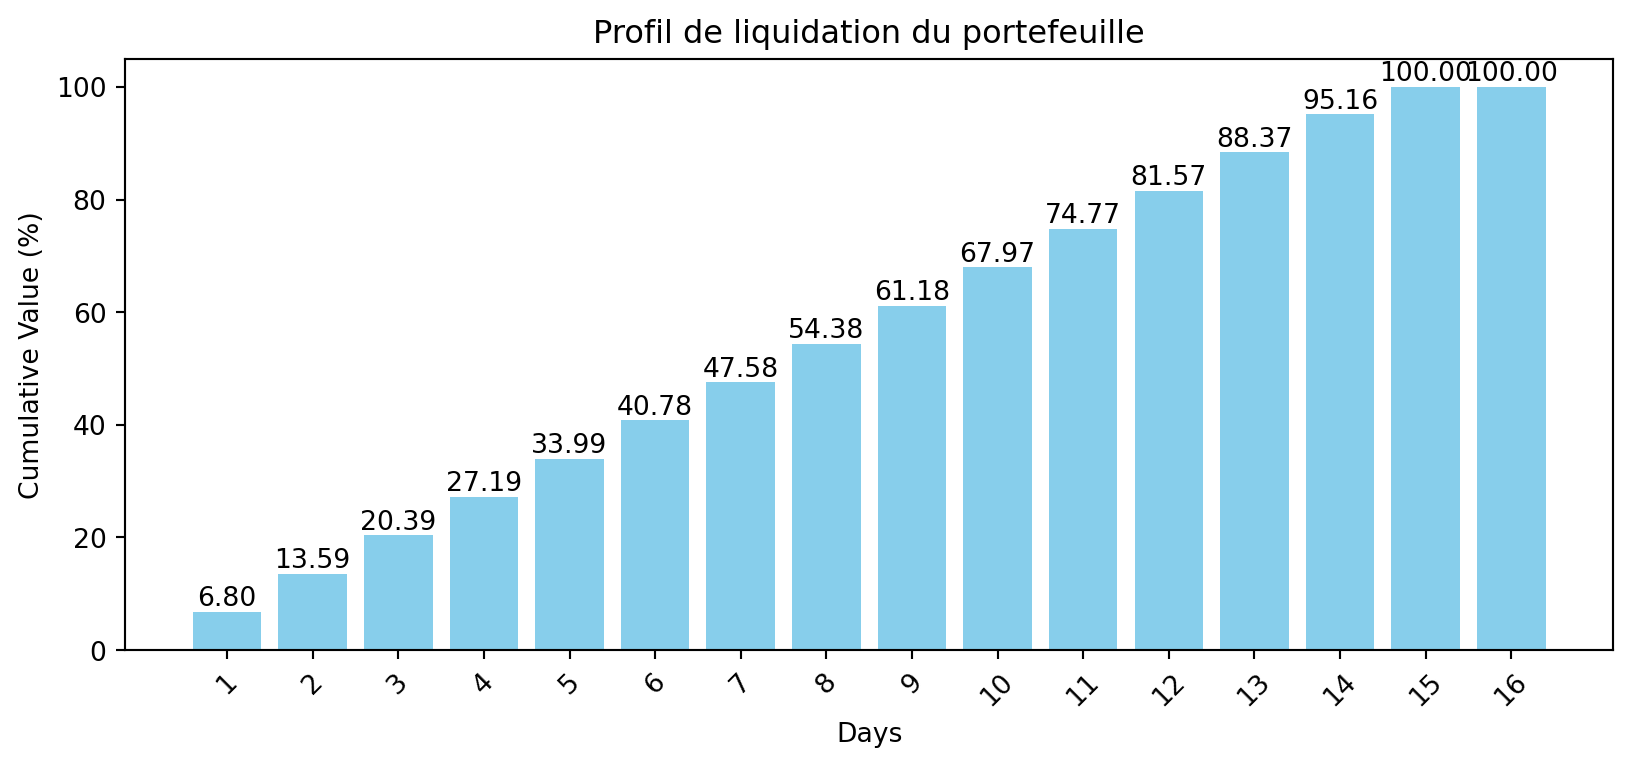

In [22]:
proforma_s_market_value_df, proforma_s_market_value, proforma_s_weights = pro_forma_liquidation(ADV=ADV_stressed, price_dict=price_dict, selected_assets=selected_assets, fact_modulation=1, plot_graphs=True)